In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'
dengue_data = pd.read_csv(file_path)

# Displaying basic information about the dataset
dataset_info = {
    "First Five Rows": dengue_data.head(),
    "Dataset Shape": dengue_data.shape,
    "Data Types": dengue_data.dtypes,
    "Missing Values": dengue_data.isnull().sum(),
    "Statistical Summary": dengue_data.describe()
}

dataset_info

{'First Five Rows':    Age     Sex Month Affected  Duration of fever (days)  \
 0   13    Male            May                        11   
 1    4  Female        January                         8   
 2   68  Female        October                        14   
 3   73    Male           July                        11   
 4   31  Female          April                         4   
 
    Current body temperature (°C)  White Blood Cell (WBC) Count  \
 0                           38.2                         11257   
 1                           38.7                          9824   
 2                           38.9                          4731   
 3                           37.8                          5055   
 4                           38.4                          5755   
 
   Back pain in eyes Joint pain Muscle pain Vomiting  ...    Rash  \
 0               Low     Medium        High      Low  ...  Medium   
 1               Low        Low        High     High  ...  Medium   
 2      

2/2 [==============================] - 0s 5ms/step - loss: 2.3731 - accuracy: 0.4833
Training Accuracy: 0.9083333611488342
Test Accuracy: 0.4833333194255829


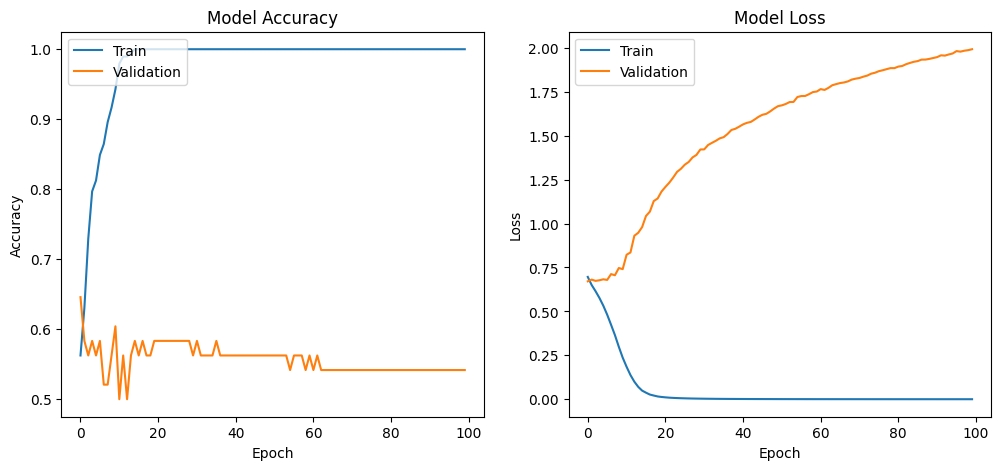

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv')

# Specify the target column
target_column = 'NS1'
X = data.drop(target_column, axis=1)
y = data[target_column].apply(lambda x: 1 if x == 'Positive' else 0)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Preprocessing the data and converting to dense array
X_processed = preprocessor.fit_transform(X).toarray()

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Building the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose = 0)

# Evaluating the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

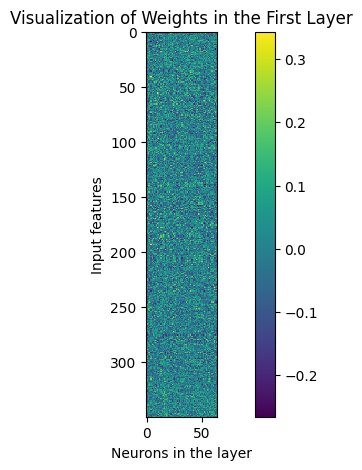

In [3]:
weights, biases = model.layers[0].get_weights()

# Assuming the layer has weights and it's not an input layer
plt.figure(figsize=(10, 5))
plt.imshow(weights, interpolation='none', cmap='viridis')
plt.colorbar()
plt.title('Visualization of Weights in the First Layer')
plt.xlabel('Neurons in the layer')
plt.ylabel('Input features')
plt.show()


# Feedforward Neural Networks (FNN)

Epoch 1/10
20/20 [==============================] - 1s 11ms/step - loss: 0.6970 - accuracy: 0.5469 - val_loss: 0.6741 - val_accuracy: 0.5625
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6405 - accuracy: 0.6771 - val_loss: 0.6688 - val_accuracy: 0.6042
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5976 - accuracy: 0.7865 - val_loss: 0.6787 - val_accuracy: 0.6667
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5518 - accuracy: 0.8542 - val_loss: 0.6821 - val_accuracy: 0.5833
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4938 - accuracy: 0.8594 - val_loss: 0.6903 - val_accuracy: 0.5625
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4335 - accuracy: 0.8958 - val_loss: 0.7213 - val_accuracy: 0.5000
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3744 - accuracy: 0.9062 - val_loss: 0.7369 - val_accuracy: 0.4792
Epoch 8/10
20/20 [=

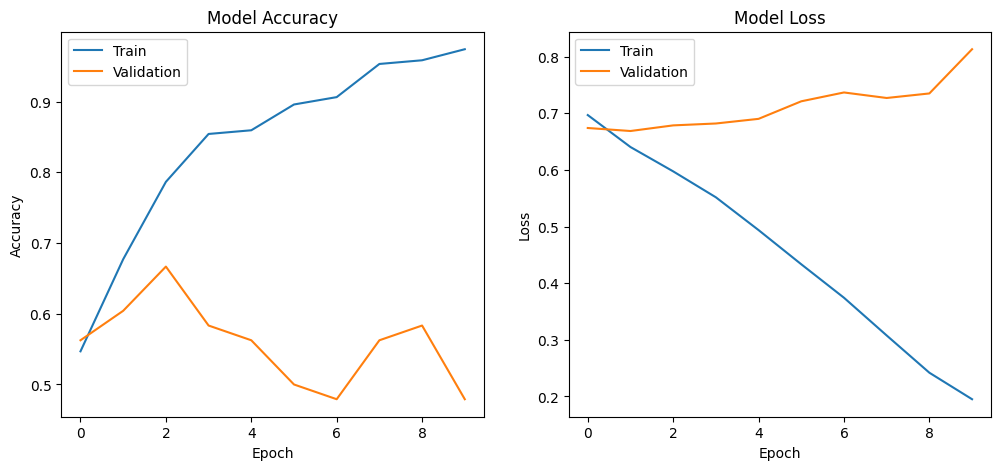

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv')

# Specify the target column
target_column = 'NS1'
X = data.drop(target_column, axis=1)
y = data[target_column].apply(lambda x: 1 if x == 'Positive' else 0)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Preprocessing the data and converting to a dense array
X_processed = preprocessor.fit_transform(X).toarray()

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Building the FNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Evaluating the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Recurrent Neural Networks (RNN)

Epoch 1/10
8/8 [==============================] - 2s 4ms/step - loss: 0.6887 - accuracy: 0.5250
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.5875
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.5958
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6139 - accuracy: 0.6833
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5972 - accuracy: 0.7167
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5823 - accuracy: 0.7917
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5654 - accuracy: 0.8125
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5499 - accuracy: 0.8167
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.7074 - accuracy: 0.5333
Training Accuracy: 0.8333333134651184
T

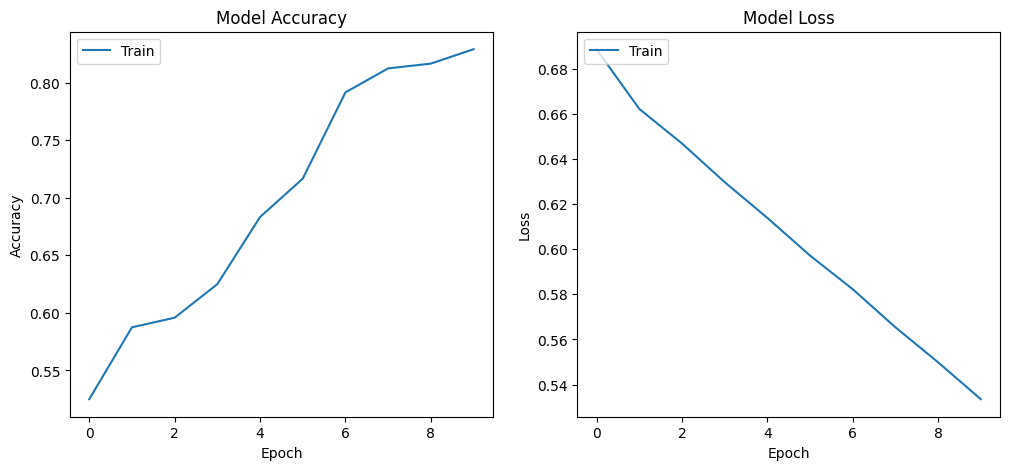

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv')

# Specify the target column
target_column = 'NS1'
X = data.drop(target_column, axis=1)
y = data[target_column].apply(lambda x: 1 if x == 'Positive' else 0)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),  # One-hot encode categorical columns
        ('num', MaxAbsScaler(), numerical_cols)  # Scale numerical columns
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Reshape data for RNN: [samples, timesteps, features]
# Assuming each row is a timestep and we reshape data to have 1 timestep per sample
X_rnn = np.expand_dims(X_processed.toarray(), axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Epoch 1/10
8/8 [==============================] - 2s 6ms/step - loss: 0.6849 - accuracy: 0.5792
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6741 - accuracy: 0.5750
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6650 - accuracy: 0.5750
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.5792
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.5792
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6339 - accuracy: 0.6000
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6196 - accuracy: 0.6083
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6042 - accuracy: 0.6583
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.5851 - accuracy: 0.6917
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.7092 - accuracy: 0.5167
Training Accuracy: 0.800000011920929
Te

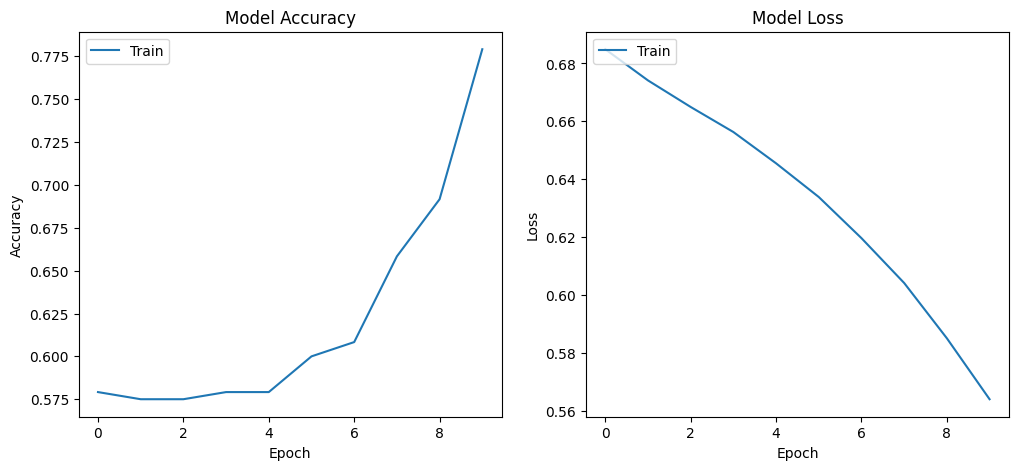

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv')

# Specify the target column
target_column = 'NS1'  # Replace with your actual target column name
X = data.drop(target_column, axis=1)
y = data[target_column].apply(lambda x: 1 if x == 'Positive' else 0)  # Adjust based on your target encoding

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),  # One-hot encode categorical columns
        ('num', MaxAbsScaler(), numerical_cols)  # Scale numerical columns
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Reshape data for LSTM: [samples, timesteps, features]
# Assuming each row is a timestep and we reshape data to have 1 timestep per sample
X_lstm = np.expand_dims(X_processed.toarray(), axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Epoch 1/50
6/6 [==============================] - 3s 77ms/step - loss: 0.6940 - accuracy: 0.4375 - val_loss: 0.6936 - val_accuracy: 0.4167
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6917 - accuracy: 0.6042 - val_loss: 0.6914 - val_accuracy: 0.6667
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6914 - accuracy: 0.5573 - val_loss: 0.6897 - val_accuracy: 0.6458
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6893 - accuracy: 0.5729 - val_loss: 0.6875 - val_accuracy: 0.6458
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6869 - accuracy: 0.5625 - val_loss: 0.6858 - val_accuracy: 0.6458
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6856 - accuracy: 0.5781 - val_loss: 0.6835 - val_accuracy: 0.6458
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.5625 - val_loss: 0.6799 - val_accuracy: 0.6458
Epoch 8/50
6/6 [===========

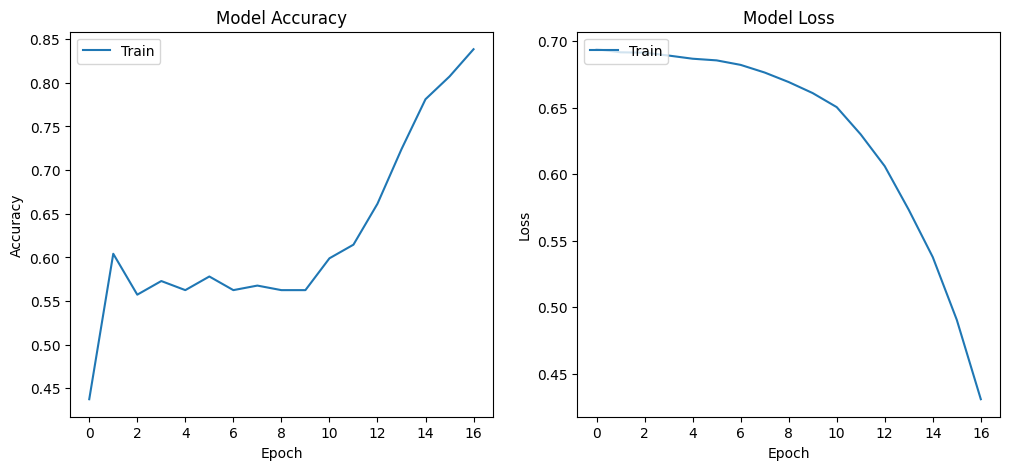

In [7]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with added complexity and dropout
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a potentially different optimizer or learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Epoch 1/50
6/6 [==============================] - 4s 59ms/step - loss: 0.7029 - accuracy: 0.5365 - val_loss: 0.7183 - val_accuracy: 0.4167
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6950 - accuracy: 0.5156 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6885 - accuracy: 0.5365 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6826 - accuracy: 0.5417 - val_loss: 0.6898 - val_accuracy: 0.5208
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6798 - accuracy: 0.5260 - val_loss: 0.6898 - val_accuracy: 0.5208
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6719 - accuracy: 0.5781 - val_loss: 0.6885 - val_accuracy: 0.5417
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6745 - accuracy: 0.5365 - val_loss: 0.6894 - val_accuracy: 0.5208
Epoch 8/50
6/6 [===========

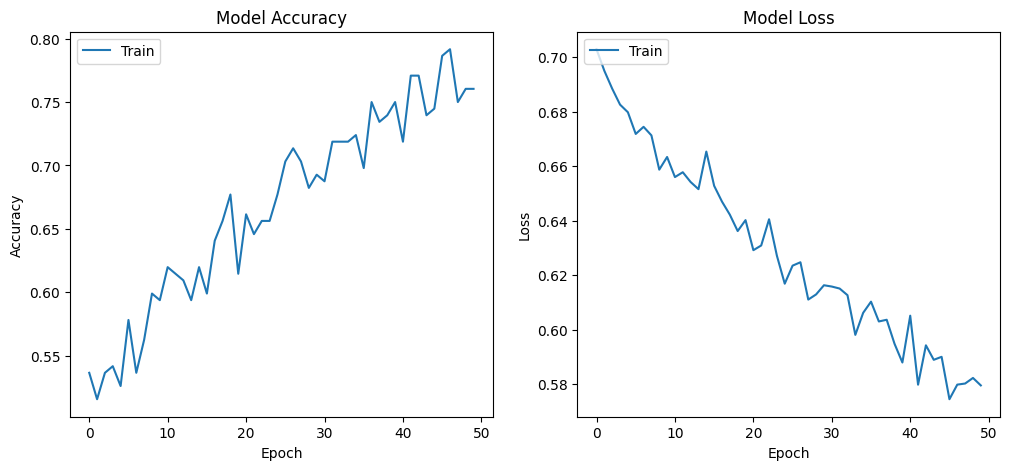

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MultiHeadAttention, Dropout, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv')

# Specify the target column
target_column = 'NS1'
X = data.drop(target_column, axis=1)
y = data[target_column].apply(lambda x: 1 if x == 'Positive' else 0)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),  # One-hot encode categorical columns
        ('num', MaxAbsScaler(), numerical_cols)  # Scale numerical columns
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Reshape data for Transformer: [samples, timesteps, features]
X_transformer = np.expand_dims(X_processed.toarray(), axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformer, y, test_size=0.2, random_state=42)

# Transformer layer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)

    # Skip connection
    x = tf.keras.layers.Add()([x, inputs])

    # Feed Forward part
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)

    # Skip connection
    x = tf.keras.layers.Add()([x, inputs])

    return x

# Building the model
input_shape = X_train.shape[1:]
inputs = tf.keras.Input(shape=input_shape)
x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


2/2 [==============================] - 0s 5ms/step


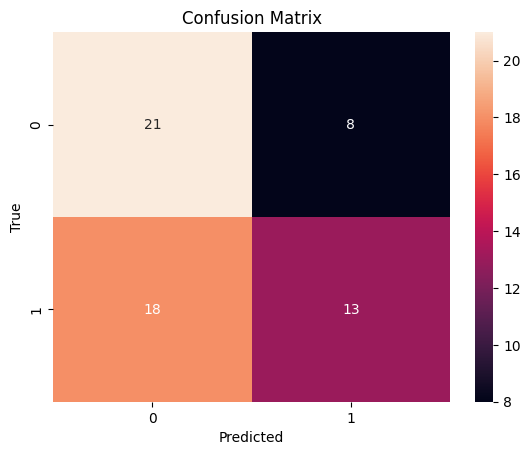

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


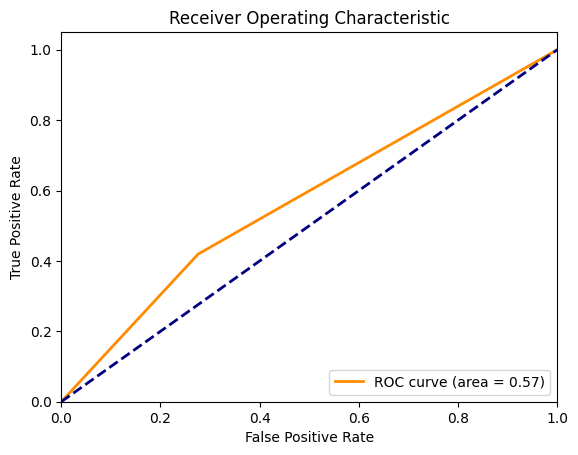

In [10]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


2/2 [==============================] - 0s 4ms/step


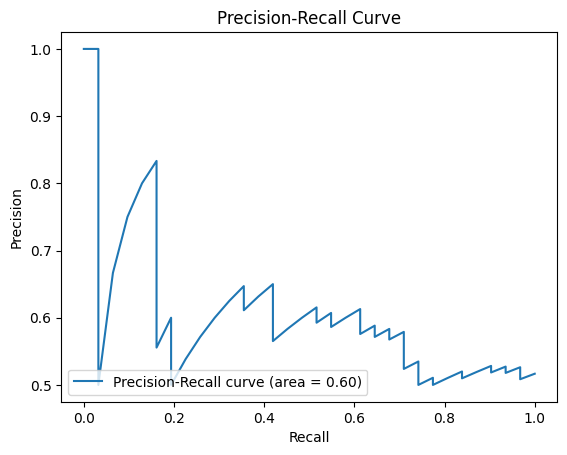

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_proba = model.predict(X_test).ravel()
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


2/2 [==============================] - 0s 4ms/step


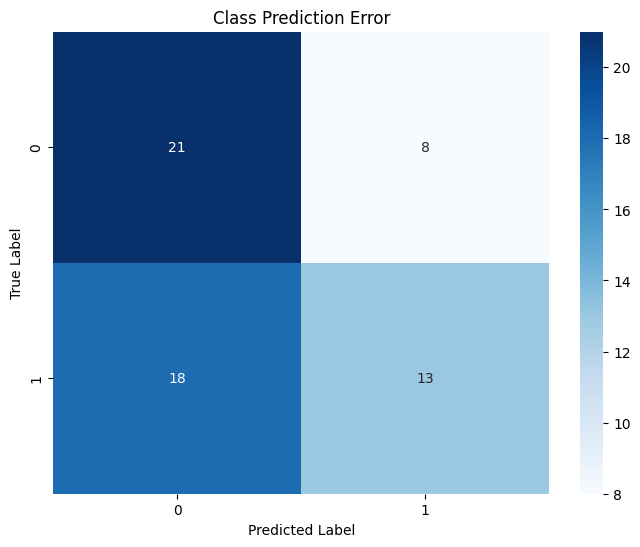

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting the Test set results and convert probabilities to class labels
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the class prediction error
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Class Prediction Error')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
